In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import pickle

import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df.shape

(10000, 14)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [59]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [60]:
df.duplicated().any()

False

In [61]:
df.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [62]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [63]:
df_copy = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df_copy['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

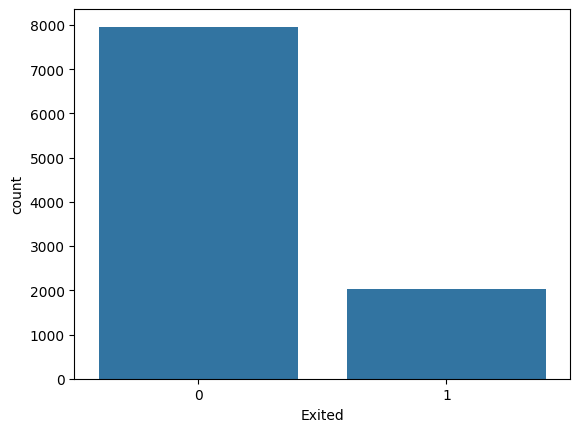

In [65]:
sns.countplot(x = 'Exited', data = df_copy)

unbalanced data

In [66]:
df_copy.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [67]:
final_df_1 = pd.get_dummies(df_copy, drop_first = True, dtype = int) #this is one hot encoding, so we can use onehot encoder from sk learn too inplace of this line of code
final_df_1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [68]:
# 1. Create the OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, drop='first') # sparse=False for dense output, drop='first' for dropping the first category

# 2. Select the categorical columns to be encoded
categorical_cols = ['Geography', 'Gender'] # Replace with your actual categorical column names

# 3. Fit and transform the data
encoded_data = encoder.fit_transform(df_copy[categorical_cols])

# 4. Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# 5. Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
final_df_2 = pd.concat([df_copy.drop(categorical_cols, axis=1), encoded_df], axis=1)
final_df_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [69]:
X = final_df_1.drop('Exited', axis = 1)
y = final_df_1['Exited']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [71]:
#ml algos that need feature scaling:
# knn , neural networks, logistic reg, linear reg

#doesnt need
#random forest, xg boost, decision tree (non linear)

In [72]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

LOGISTIC REG

In [73]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [74]:
y_pred_lr = lr.predict(X_test_sc)

In [75]:
ac_lr = accuracy_score(y_test, y_pred_lr)
print(ac_lr)

0.808


In [76]:
print(precision_score(y_test, y_pred_lr))
print(recall_score(y_test, y_pred_lr))
print(f1_score(y_test, y_pred_lr))

0.5891472868217055
0.18673218673218672
0.2835820895522388


In [77]:
#handling imbalanced dataset with smote
from imblearn.over_sampling import SMOTE

In [78]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

In [79]:
y_smote.value_counts()

,count
Exited,
1,7963
0,7963


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

In [81]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [82]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [83]:
y_pred_lr = lr.predict(X_test_sc)

In [84]:
print(accuracy_score(y_test, y_pred_lr))
print(precision_score(y_test, y_pred_lr))
print(recall_score(y_test, y_pred_lr))
print(f1_score(y_test, y_pred_lr))

0.7878217200251099
0.7735495945102931
0.798454603992273
0.7858048162230672


In [85]:
#lets use other models too

SVM

In [86]:
from sklearn import svm

In [87]:
svm = svm.SVC()

In [88]:
svm.fit(X_train_sc, y_train)

SVC()

In [89]:
y_pred_svm = svm.predict(X_test_sc)

In [90]:
print(accuracy_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))

0.8462021343377275
0.8328115216030056
0.8564069542820347
0.8444444444444444


KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [92]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [93]:
y_pred_knn = knn.predict(X_test_sc)

In [94]:
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_knn))

0.8242310106716887
0.8018237082066869
0.8493238892466195
0.8248905565978737


DECISION TREE

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [96]:
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [97]:
y_pred_dt = dt.predict(X_test_sc)

In [98]:
print(accuracy_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(f1_score(y_test, y_pred_dt))

0.7959824231010671
0.7771639042357275
0.815196394075982
0.7957259585166562


RANDOM FOREST

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [100]:
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [101]:
y_pred_rf = rf.predict(X_test_sc)

In [102]:
print(accuracy_score(y_test, y_pred_rf))
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))
print(f1_score(y_test, y_pred_rf))

0.8634651600753296
0.8529040404040404
0.8699291693496458
0.8613324832642653


GRADIENT BOOST

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [104]:
gb.fit(X_train_sc, y_train)

GradientBoostingClassifier()

In [105]:
y_pred_gb = gb.predict(X_test_sc)

In [106]:
print(accuracy_score(y_test, y_pred_gb))
print(precision_score(y_test, y_pred_gb))
print(recall_score(y_test, y_pred_gb))
print(f1_score(y_test, y_pred_gb))

0.8490269930947897
0.8462532299741602
0.8435286542176432
0.8448887455659465


In [107]:
acc_score = {"logistic_regression":accuracy_score(y_test, y_pred_lr),
             "svm":accuracy_score(y_test, y_pred_svm),
             "knn":accuracy_score(y_test, y_pred_knn),
             "decision_tree":accuracy_score(y_test, y_pred_dt),
             "random_forest":accuracy_score(y_test, y_pred_rf),
             "gradient_boost":accuracy_score(y_test, y_pred_gb)
             }
acc_score

{'logistic_regression': 0.7878217200251099,
 'svm': 0.8462021343377275,
 'knn': 0.8242310106716887,
 'decision_tree': 0.7959824231010671,
 'random_forest': 0.8634651600753296,
 'gradient_boost': 0.8490269930947897}

In [121]:
acc_df = pd.DataFrame.from_dict(acc_score, orient = 'index', columns = ['accuracy']).reset_index().rename(columns={'index': 'models'})

#or pd.DataFrame(acc_score, index = ['accuracy'])
acc_df

,models,accuracy
0,logistic_regression,0.787822
1,svm,0.846202
2,knn,0.824231
3,decision_tree,0.795982
4,random_forest,0.863465
5,gradient_boost,0.849027


<Axes: xlabel='models', ylabel='accuracy'>

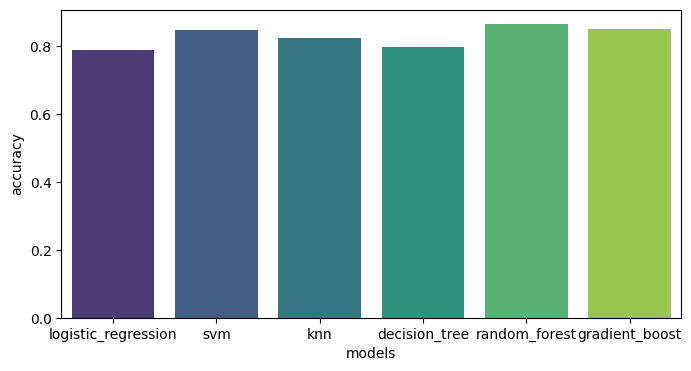

In [125]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'models', y = 'accuracy', data = acc_df, palette="viridis") #more palettes  "plasma", "magma", "inferno", "cividis", etc.

In [126]:
#similarly lets add all the 4 scores in the dataframe
acc_df['precision'] = [precision_score(y_test, y_pred_lr),
                       precision_score(y_test, y_pred_svm),
                       precision_score(y_test, y_pred_knn),
                       precision_score(y_test, y_pred_dt),
                       precision_score(y_test, y_pred_rf),
                       precision_score(y_test, y_pred_gb)]
acc_df['recall'] = [recall_score(y_test, y_pred_lr),
                       recall_score(y_test, y_pred_svm),
                       recall_score(y_test, y_pred_knn),
                       recall_score(y_test, y_pred_dt),
                       recall_score(y_test, y_pred_rf),
                       recall_score(y_test, y_pred_gb)]
acc_df['f1_score'] = [f1_score(y_test, y_pred_lr),
                       f1_score(y_test, y_pred_svm),
                       f1_score(y_test, y_pred_knn),
                       f1_score(y_test, y_pred_dt),
                       f1_score(y_test, y_pred_rf),
                       f1_score(y_test, y_pred_gb)]

In [127]:
acc_df

,models,accuracy,precision,recall,f1_score
0,logistic_regression,0.787822,0.773550,0.798455,0.785805
1,svm,0.846202,0.832812,0.856407,0.844444
2,knn,0.824231,0.801824,0.849324,0.824891
3,decision_tree,0.795982,0.777164,0.815196,0.795726
4,random_forest,0.863465,0.852904,0.869929,0.861332
5,gradient_boost,0.849027,0.846253,0.843529,0.844889


<Axes: xlabel='models', ylabel='f1_score'>

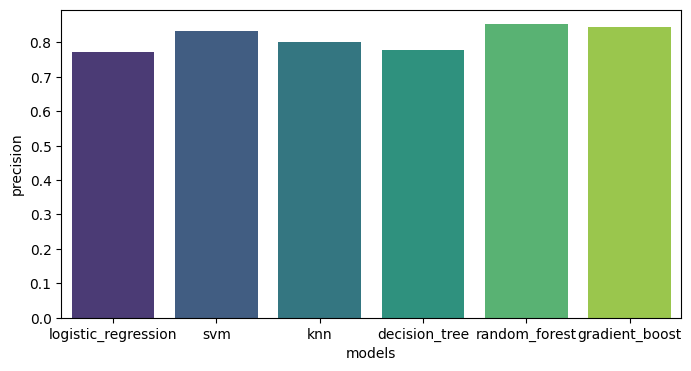

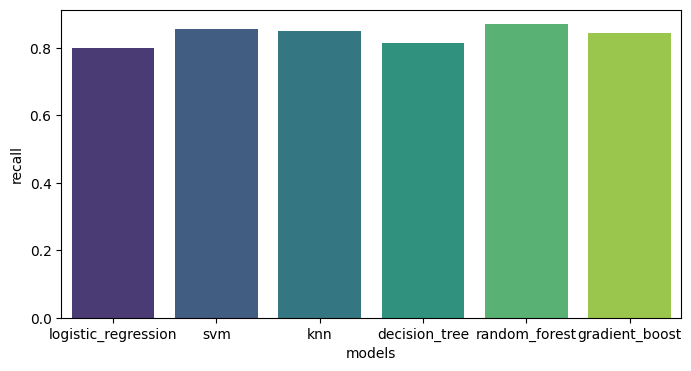

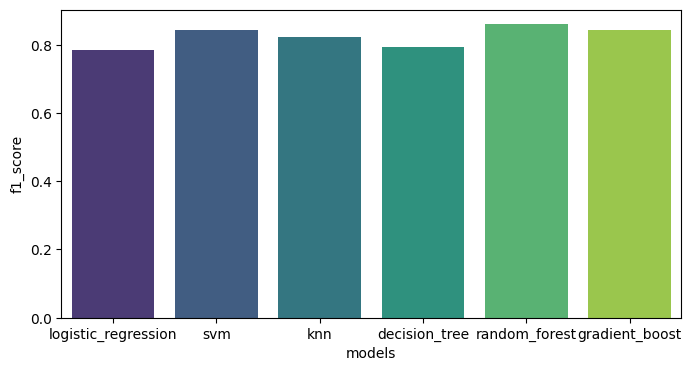

In [128]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'models', y = 'precision', data = acc_df, palette="viridis")

plt.figure(figsize = (8, 4))
sns.barplot(x = 'models', y = 'recall', data = acc_df, palette="viridis")

plt.figure(figsize = (8, 4))
sns.barplot(x = 'models', y = 'f1_score', data = acc_df, palette="viridis")

we can see random forest gives us the best accuracies

In [130]:
#lets save it
X_final = sc.fit_transform(X_smote)

In [131]:
rf.fit(X_final, y_smote)

RandomForestClassifier()

In [132]:
import joblib

In [133]:
joblib.dump(rf, 'churn_rf')

['churn_rf']

In [ ]:
# Instead of joblib.dump, use pickle.dump:
# pickle.dump(rf, open('churn_rf.pkl', 'wb'))

While both pickle and joblib can be used to save models, joblib is generally recommended for scikit-learn models because:

Efficiency: joblib is more efficient at handling large NumPy arrays, which are common in scikit-learn.
Numpy-aware: It's specifically designed for objects containing large NumPy arrays.
Compression: joblib can optionally compress the saved data, making the files smaller.
However, pickle is a more general-purpose serialization library and can be used to save a wider variety of Python objects. It's a good option if you need compatibility with older code or systems that may not have joblib installed.

In many cases, using either pickle or joblib to save a simple model like a Random Forest will give you similar results. Choosing either of them for this particular scenario will work fine.

In [134]:
model = joblib.load('churn_rf')

In [ ]:
model.predict() #insert test set